# House Prices - Advanced Regression Techniques

# Summary:
1. Data description
2. Objetive
3. Exploratory data analysis
4. Preprocessing
5. Hyperparameter tuning and model evaluation

# 1. DATA DESCRIPTION


- SalePrice - the property's sale price in dollars. 
- MSSubClass (The building class).
- MSZoning (Identifies the general zoning classification of the sale).
- LotFrontage: Linear feet of street connected to property.
- LotArea: Lot size in square feet.
- Street (Type of road access to property).
- Alley (Type of alley access to property).
- LotShape (General shape of property).
- LandContour (Flatness of the property).
- Utilities (Type of utilities available).
- LotConfig (Lot configuration).
- LandSlope (Slope of property).
- Neighborhood (Physical locations within Ames city limits).
- Condition1 (Proximity to main road or railroad).
- Condition2 (Proximity to main road or railroad, if a second is present).
- BldgType (Type of dwelling).
- HouseStyle (Style of dwelling).
- OverallQual (Overall material and finish quality).
- OverallCond (Overall condition rating).
- YearBuilt: Original construction date.
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions).
- RoofStyle (Type of roof).
- RoofMatl (Roof material).
- Exterior1st (Exterior covering on house).
- Exterior2nd (Exterior covering on house, if more than one material).
- MasVnrType (Masonry veneer type).
- MasVnrArea (Masonry veneer area in square feet).
- ExterQual (Exterior material quality).
- ExterCond (Present condition of the material on the exterior).
- Foundation (Type of foundation).
- BsmtQual (Height of the basement).
- BsmtCond (General condition of the basement).
- BsmtExposure (Walkout or garden level basement walls).
- BsmtFinType1 (Quality of basement finished area).
- BsmtFinSF1: Type 1 finished square feet.
- BsmtFinType2 (Quality of second finished area, if present).
- BsmtFinSF2: Type 2 finished square feet.
- BsmtUnfSF: Unfinished square feet of basement area.
- TotalBsmtSF: Total square feet of basement area.
- Heating (Type of heating).
- HeatingQC (Heating quality and condition).
- CentralAir (Central air conditioning).
- Electrical (Electrical system)..
- 1stFlrSF: First Floor square feet.
- 2ndFlrSF: Second floor square feet.
- LowQualFinSF: Low quality finished square feet (all floors).
- GrLivArea: Above grade (ground) living area square feet.
- BsmtFullBath: Basement full bathrooms.
- BsmtHalfBath: Basement half bathrooms.
- FullBath: Full bathrooms above grade.
- HalfBath: Half baths above grade.
- Bedroom: Number of bedrooms above basement level.
- Kitchen: Number of kitchens.
- KitchenQual (Kitchen quality).
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms).
- Functional (Home functionality rating).
- Fireplaces: Number of fireplaces.
- FireplaceQu (Fireplace quality).
- GarageType (Garage location).
- GarageYrBlt: Year garage was built.
- GarageFinish (Interior finish of the garage).
- GarageCars: Size of garage in car capacity.
- GarageArea: Size of garage in square feet.
- GarageQual (Garage quality).
- GarageCond (Garage condition).
- PavedDrive (Paved driveway).
- WoodDeckSF: Wood deck area in square feet.
- OpenPorchSF: Open porch area in square feet.
- EnclosedPorch: Enclosed porch area in square feet.
- 3SsnPorch: Three season porch area in square feet.
- ScreenPorch: Screen porch area in square feet.
- PoolArea: Pool area in square feet.
- PoolQC (Pool quality).
- Fence (Fence quality).
- MiscFeature (Miscellaneous feature not covered in other categories).
- MiscVal: Value of miscellaneous feature.
- MoSold: Month Sold.
- YrSold: Year Sold.
- SaleType (Type of sale).

# 2. OBJETIVE

Create a model able to predict the sale price of different houses based on the provided dataset.

# 3. EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from dython.nominal import associations
from IPython.display import display
import missingno as msno

sns.set_style("whitegrid", {"axes.grid" : True, "axes.edgecolor":"black"})
pd.set_option("display.max_columns", None)
%matplotlib inline

In [2]:
def load_data(train_path, test_path):
    train = pd.read_csv(train_path)
    test = pd.read_csv(test_path)
    return train, test

train_path = "/Users/agustintumminello/Desktop/regression ibm ml/house-prices-advanced-regression-techniques (1)/train.csv"
test_path = "/Users/agustintumminello/Desktop/regression ibm ml/house-prices-advanced-regression-techniques (1)/test.csv"

train, test = load_data(train_path, test_path) 

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(f"The data set has {train.shape[0]} rows.")
print(f"The data set has {train.shape[1]} columns.")

The data set has 1460 rows.
The data set has 81 columns.


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Types of variables:

# Numericals and Categoricals

In [6]:
overall_mapping = {
    10 : "Very Excellent",
    9 : "Excellent",
    8 : "Very Good",
    7 : "Good",
    6 : "Above Average",
    5 : "Average",
    4 : "Below Average",
    3 : "Fair",
    2 : "Poor",
    1 : "Very Poor",
}

train["OverallQual"] = train["OverallQual"].replace(overall_mapping)
train["OverallCond"] = train["OverallCond"].replace(overall_mapping)

In [7]:
#numericals
numericals = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", 
              "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", 
              "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
              "YearBuilt", "YearRemodAdd", "GarageYrBlt", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath",
              "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "SalePrice", "YrSold", 
              "MoSold"]

#categoricals
categoricals = ["LotShape", "Utilities", "LandSlope", "OverallQual", "OverallCond", "ExterQual", "ExterCond",
                "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "Electrical",
                "KitchenQual", "Functional", "FireplaceQu", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive",
                "PoolQC", "Fence", "MSSubClass", "MSZoning", "Street", "Alley", "LandContour", "LotConfig", 
                "Neighborhood", "Condition1","Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", 
                "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating", "CentralAir", "GarageType", 
                "MiscFeature", "SaleType", "SaleCondition","Id"]

# Null values

In [8]:
null = pd.DataFrame(train.
                     isnull()
                     .mean()
                     .sort_values(ascending=False),
                     columns = ["Null %"])

null = null[null["Null %"] != 0]
null

,Null %
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
FireplaceQu,0.472603
LotFrontage,0.177397
GarageYrBlt,0.055479
GarageCond,0.055479
GarageType,0.055479
GarageFinish,0.055479


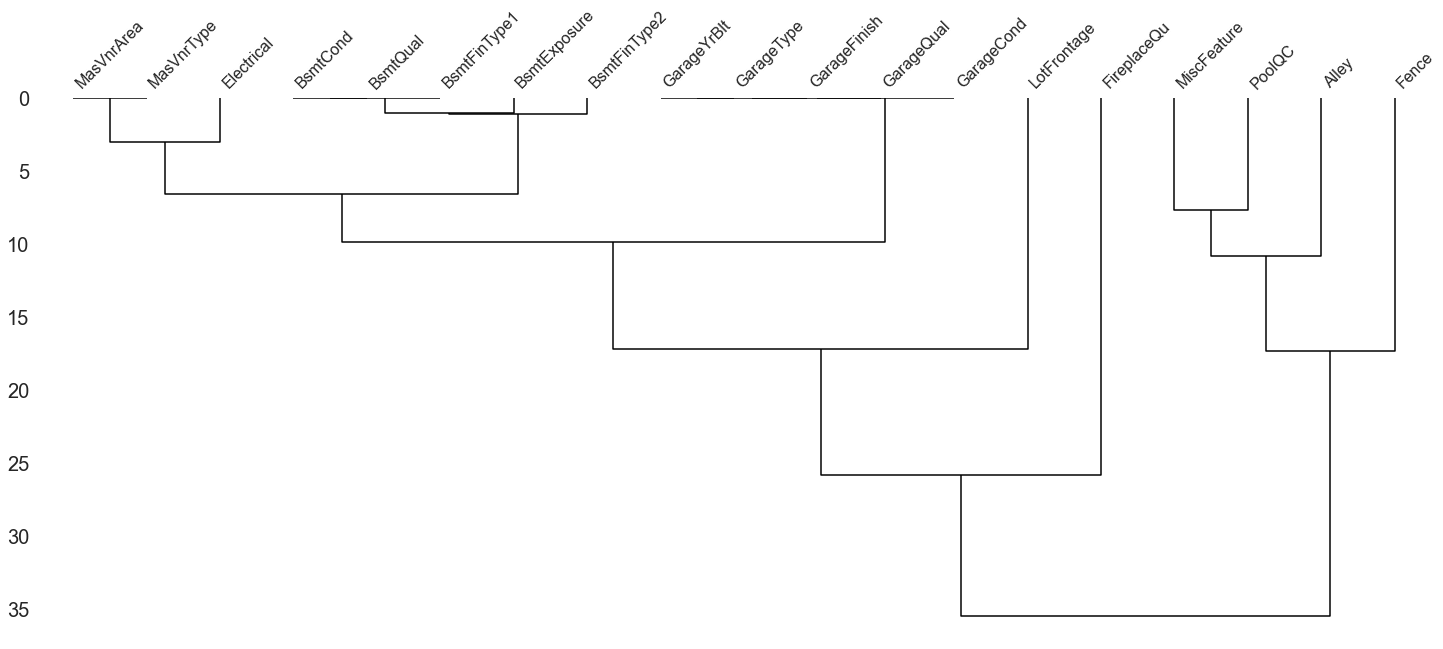

In [9]:
# Dendrogram for columns having missing values
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
missing_columns
msno.dendrogram(train[missing_columns]);

Cols with biggest % of null values are:

- PoolQC
- MiscFeature
- Alley"
- Fence
- FireplaceQu

# Variation in numerical features

In [10]:
(train[numericals]
 .var()
 .sort_values(ascending=False)
 .to_frame("var"))

,var
SalePrice,6.311111e+09
LotArea,9.962565e+07
GrLivArea,2.761296e+05
MiscVal,2.461381e+05
BsmtFinSF1,2.080255e+05
BsmtUnfSF,1.952464e+05
TotalBsmtSF,1.924624e+05
2ndFlrSF,1.905571e+05
1stFlrSF,1.494501e+05
GarageArea,4.571251e+04


# Cardinality in categorical features

In [11]:
(train[categoricals]
 .nunique()
 .sort_values(ascending=False)
 .to_frame("unique values"))

,unique values
Id,1460
Neighborhood,25
Exterior2nd,16
Exterior1st,15
MSSubClass,15
OverallQual,10
OverallCond,9
SaleType,9
Condition1,9
HouseStyle,8


# Target

In [12]:
(train
 .SalePrice
 .describe()
 .to_frame())

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


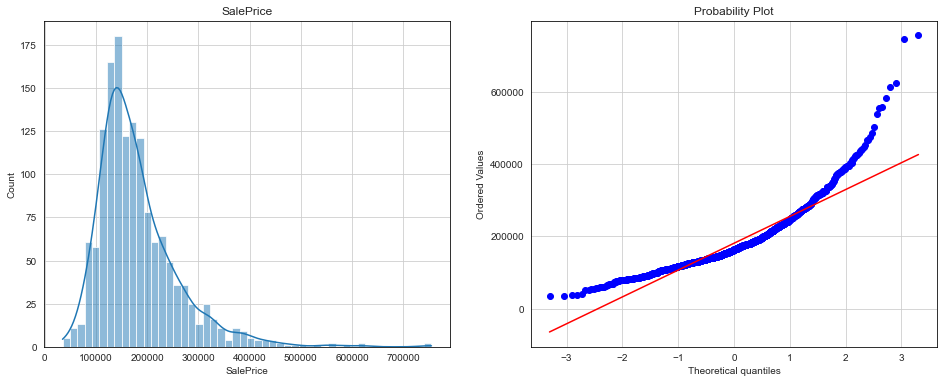

1.880940746034036

In [13]:
#histogram and normal probability plot
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.histplot(train["SalePrice"],bins=50,kde=True)
plt.title("SalePrice")
plt.subplot(1,2,2)
stats.probplot(train["SalePrice"],plot=plt)
plt.show()
stats.skew(train["SalePrice"])

Target is right skewed.

# Outliers

In [14]:
#Detecting outliers.
def detect_outliers(df,n,features):
    outlier_indices=[]
    for col in features:
        q1=np.percentile(df[col],25)
        q3=np.percentile(df[col],75)
        iqr=q3-q1
        indices_step=iqr*1.5
        outlier_list_col=df[(df[col]<q1-indices_step)|(df[col]>q3+indices_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices=Counter(outlier_indices)
    multiple_outliers=list(key for key, value in outlier_indices.items() if value > n)
    return multiple_outliers

outliers = detect_outliers(train,2,numericals)
train.loc[outliers]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,Excellent,Average,1981,1987,Gable,WdShngl,WdShing,Wd Shng,None,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32,1842,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,1981.0,Fin,3,894,TA,TA,Y,857,72,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
113,114,20,RL,NaN,21000,Pave,NaN,Reg,Bnk,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1Story,Above Average,Average,1953,1953,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,184.0,TA,Gd,CBlock,Gd,TA,Mn,ALQ,35,Rec,869,905,1809,GasA,TA,Y,SBrkr,2259,0,0,2259,1,0,2,0,3,1,Gd,7,Typ,2,Gd,Basment,1953.0,Unf,2,450,TA,TA,Y,166,120,192,0,0,0,NaN,MnPrv,NaN,0,10,2007,COD,Abnorml,217000
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,Very Excellent,Excellent,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1107,1107,GasA,Ex,Y,SBrkr,1518,1518,572,3608,0,0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993.0,Unf,3,840,Ex,TA,Y,0,260,0,0,410,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,Very Good,Below Average,1918,1990,Gable,CompShg,Stucco,Stucco,None,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036,LwQ,184,140,1360,GasA,Gd,Y,SBrkr,1360,1360,392,3112,1,1,2,0,4,1,Gd,8,Typ,1,Ex,Detchd,1918.0,Unf,2,795,TA,TA,Y,0,16,552,0,0,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,Above Average,Good,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,1417,190,RM,60.0,11340,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,Below Average,Above Average,1885,1950,Gable,CompShg,VinylSd,AsbShng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,777,777,GasA,Gd,Y,SBrkr,1246,1044,0,2290,0,0,2,0,4,2,TA,11,Typ,0,NaN,Detchd,1971.0,Unf,2,560,TA,TA,N,0,0,114,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,122500
1181,1182,120,RM,64.0,5587,Pave,NaN,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,TwnhsE,1Story,Very Good,Average,2008,2008,Hip,CompShg,CemntBd,CmentBd,Stone,186.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1480,Unf,0,120,1600,GasA,Ex,Y,SBrkr,1652,0,0,1652,1,1,2,0,2,1,Gd,5,Typ,1,Gd,Attchd,2008.0,Fin,2,482,TA,TA,Y,162,53,0,153,0,0,NaN,NaN,NaN,0,11,2008,New,Partial,392500
93,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,Above Average,Above Average,1910,1998,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,Fa,Mn,Rec,1046,Unf,0,168,1214,GasW,Ex,N,SBrkr,1260,1031,0,2291,0,1,2,0,4,2,TA,9,Typ,1,Gd,Detchd,1900.0,Unf,2,506,TA,TA,Y,0,0,0,0,99,0,NaN,NaN,NaN,0

There are 102 outliers.

# Univariate analysis: numerical features

In [15]:
(train[numericals]
 .describe()
 .T)

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,2065.0
LowQualFinSF,1460.0,5.844521,48.623081,0.0,0.00,0.0,0.00,572.0


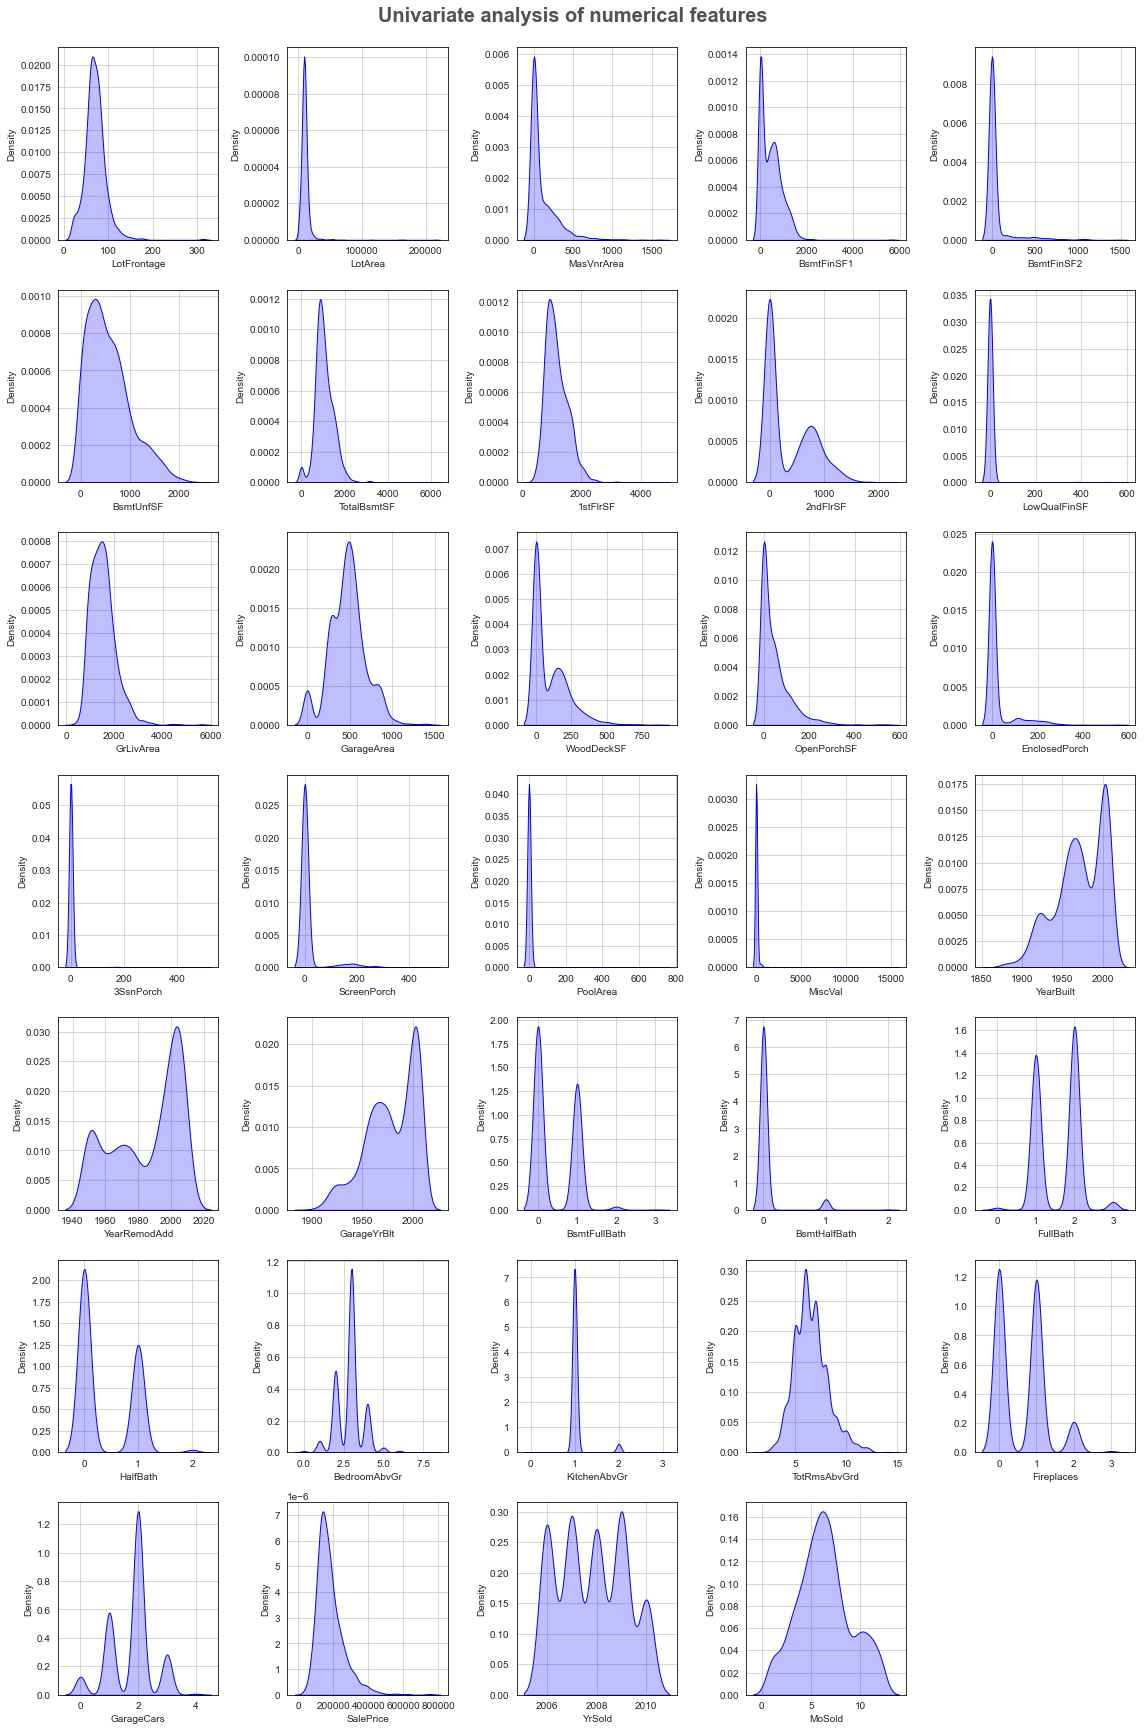

In [16]:
plt.figure(figsize=(4*4, 4*6))
plt.suptitle("Univariate analysis of numerical features", 
             fontsize=20, 
             fontweight="bold", 
             alpha=0.8, 
             y=1.)

for i in range(0, len(numericals)):
    plt.subplot(7, 5, i+1)
    sns.kdeplot(x=train[numericals[i]],shade=True, color="b")
    plt.xlabel(numericals[i])
    plt.tight_layout()

Numerical features are skewed.

# Univariate analysis: Categorical Features

In [17]:
(train[categoricals]
 .describe(include="object")
 .T)

,count,unique,top,freq
LotShape,1460,4,Reg,925
Utilities,1460,2,AllPub,1459
LandSlope,1460,3,Gtl,1382
OverallQual,1460,10,Average,397
OverallCond,1460,9,Average,821
ExterQual,1460,4,TA,906
ExterCond,1460,5,TA,1282
BsmtQual,1423,4,TA,649
BsmtCond,1423,4,TA,1311
BsmtExposure,1422,4,No,953


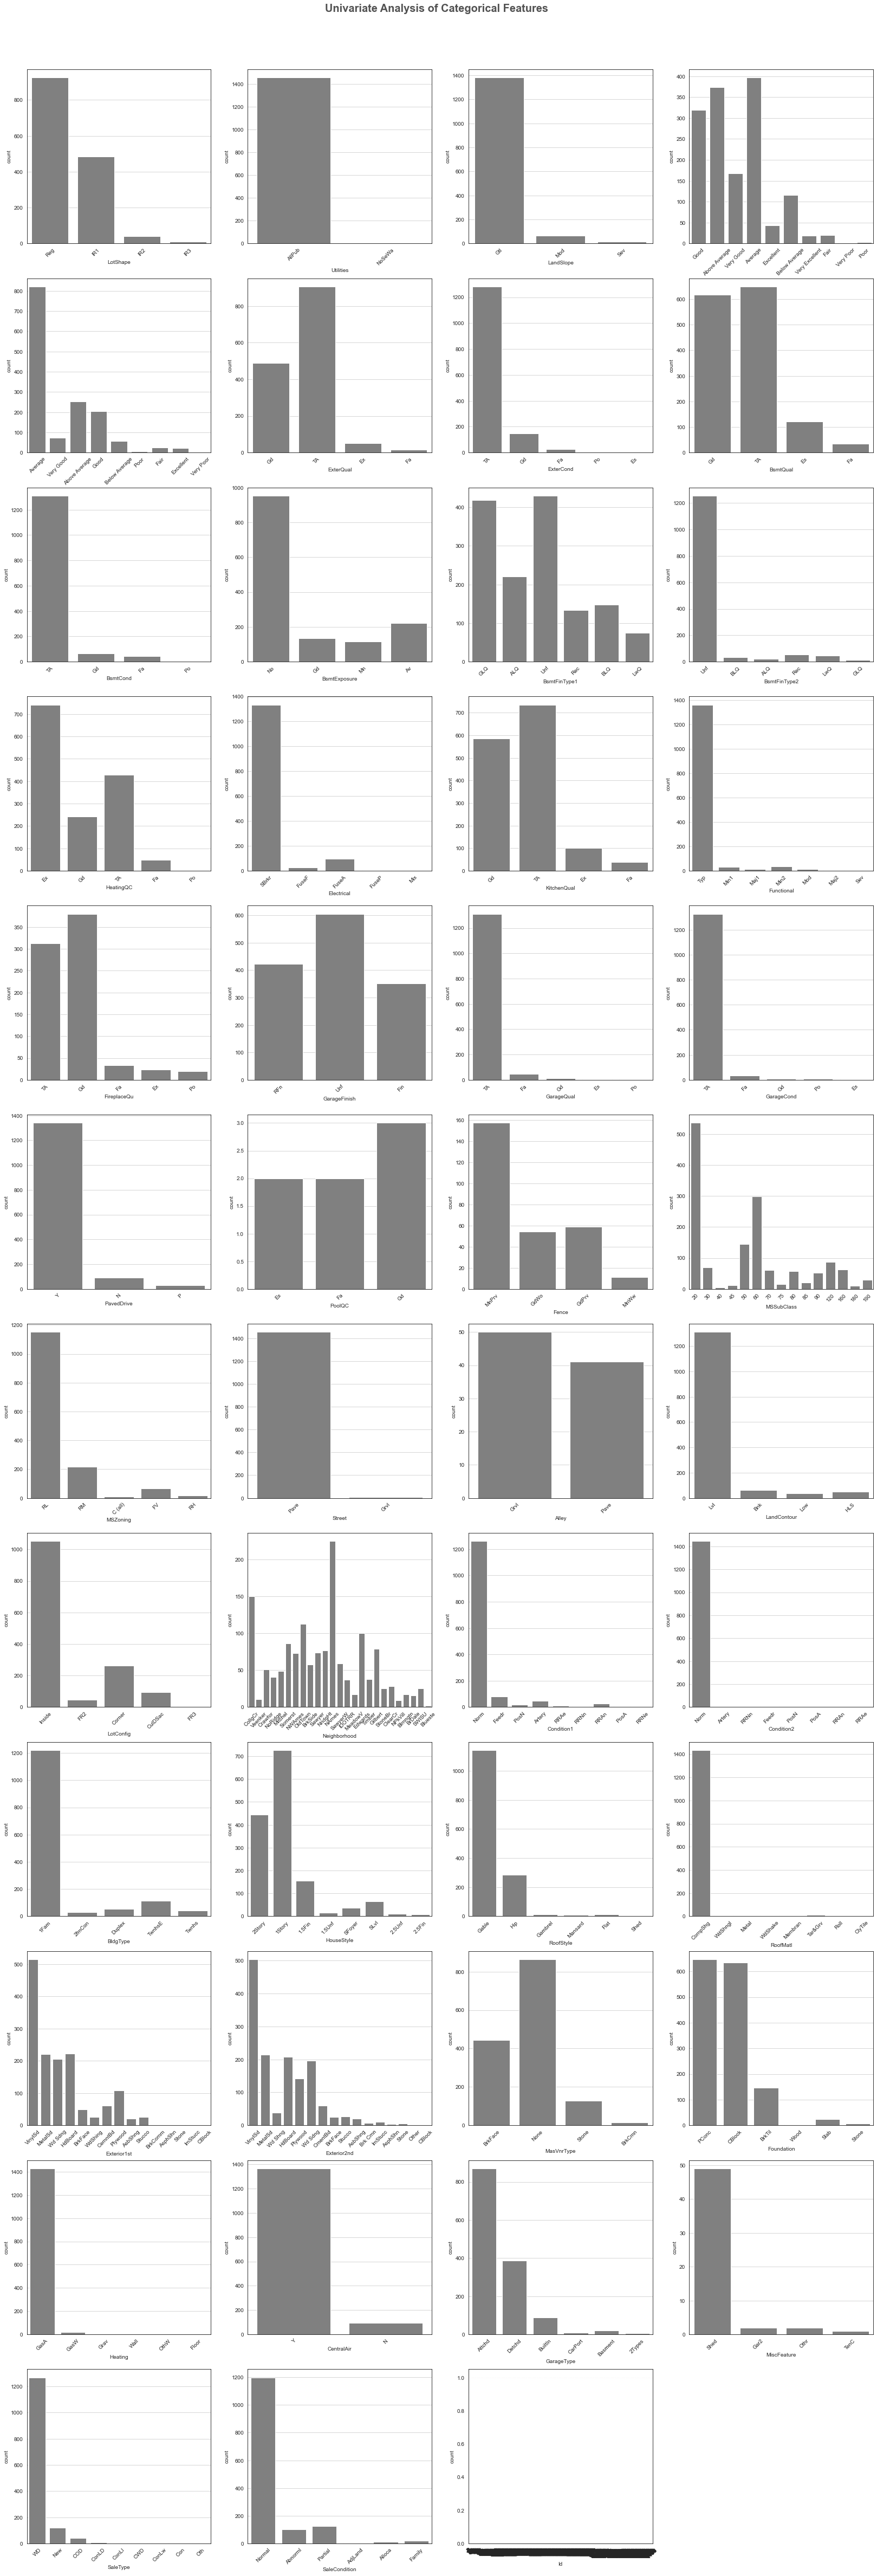

In [18]:
plt.figure(figsize=(4*7, 12*7))
plt.suptitle("Univariate Analysis of Categorical Features", 
             fontsize=20, 
             fontweight="bold", 
             alpha=0.8, 
             y=0.9)

for i in range(0, len(categoricals)):
    plt.subplot(12, 4, i+1)
    sns.countplot(x=train[categoricals[i]], color=("grey"))
    plt.xlabel(categoricals[i])
    plt.xticks(rotation=45)

# Correlations:  numerical features

# Correlation with the target

In [19]:
correlation = train[numericals].corr(method="spearman").abs()

((correlation["SalePrice"]
  .drop("SalePrice")
  .sort_values(ascending=False))
 .to_frame("corr with target"))

,corr with target
GrLivArea,0.731310
GarageCars,0.690711
YearBuilt,0.652682
GarageArea,0.649379
FullBath,0.635957
TotalBsmtSF,0.602725
GarageYrBlt,0.593788
1stFlrSF,0.575408
YearRemodAdd,0.571159
TotRmsAbvGrd,0.532586


# Correlation between predictors

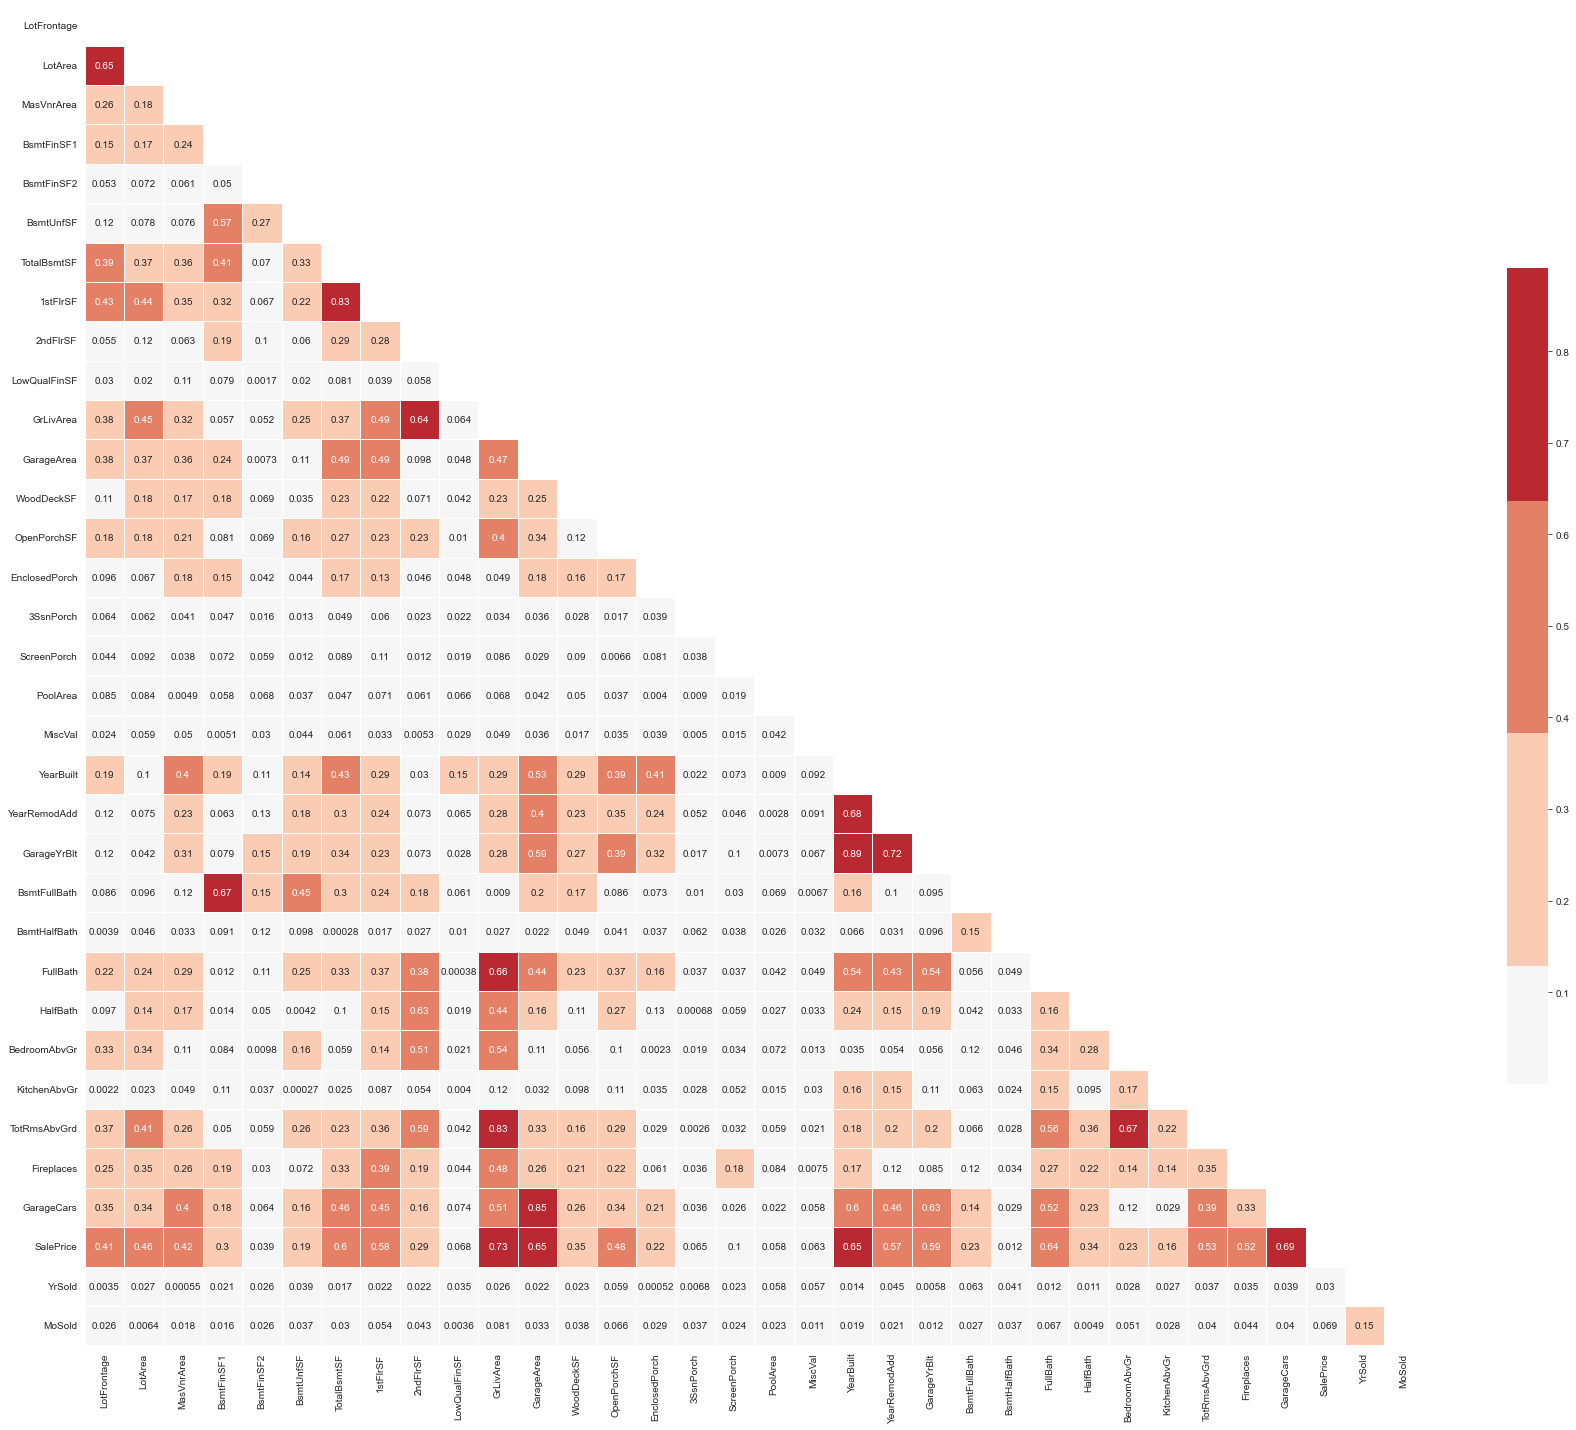

In [20]:
correlation = train[numericals].corr(method="spearman").abs()

mask = np.zeros_like(correlation, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(correlation, 
            mask=mask, 
            center=0,
            square=True, 
            annot=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            cmap=sns.color_palette("RdBu_r", 7))
plt.show()

In [21]:
#Features with correlation > 0.60

c = train.corr()
threshold = 0.60
np.abs(c.values) > threshold
[f"{c.columns[i]} and {c.columns[j]}" for i, j in zip(*np.where(np.abs(c.values) > threshold)) if i < j]

['YearBuilt and GarageYrBlt',
 'YearRemodAdd and GarageYrBlt',
 'BsmtFinSF1 and BsmtFullBath',
 'TotalBsmtSF and 1stFlrSF',
 'TotalBsmtSF and SalePrice',
 '1stFlrSF and SalePrice',
 '2ndFlrSF and GrLivArea',
 '2ndFlrSF and HalfBath',
 '2ndFlrSF and TotRmsAbvGrd',
 'GrLivArea and FullBath',
 'GrLivArea and TotRmsAbvGrd',
 'GrLivArea and SalePrice',
 'BedroomAbvGr and TotRmsAbvGrd',
 'GarageCars and GarageArea',
 'GarageCars and SalePrice',
 'GarageArea and SalePrice']

# Correlations: categorical features

# Bivariate categorical analysis

- Chi-square statistic to show relationship between Categorical columns with the target column (SalePrice)

0. Null Hypothesis (H0): There is no substantial relationship between the two variables (Categorical feature and SalePrice). 


1. Alternative Hypothesis (H1): There is a substantial relationship between variables.

In [22]:
from scipy.stats import chi2_contingency

chi2_test = []

for feature in categoricals:
    if chi2_contingency(pd.crosstab(train["SalePrice"], train[feature]))[1] < 0.05:
        chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("Fail to Reject Null Hypothesis")
        
result = pd.DataFrame(data=[categoricals, chi2_test]).T
result.columns = ["Column", "Hypothesis Result"]
result

,Column,Hypothesis Result
0,LotShape,Reject Null Hypothesis
1,Utilities,Fail to Reject Null Hypothesis
2,LandSlope,Fail to Reject Null Hypothesis
3,OverallQual,Reject Null Hypothesis
4,OverallCond,Reject Null Hypothesis
5,ExterQual,Reject Null Hypothesis
6,ExterCond,Reject Null Hypothesis
7,BsmtQual,Reject Null Hypothesis
8,BsmtCond,Reject Null Hypothesis
9,BsmtExposure,Reject Null Hypothesis


# Correlation between categorical predictors

I cant use the standard correlation matrix to measure the correlation between categorical cols, it uses all numerical measures.
So, for this analysis im going to use the library Dython.

it has a correlation matrix that can be used for categorical variables, how it works?
- Pearson’s R for continuous-continuous cases.
- Correlation Ratio for categorical-continuous cases.
- Cramer’s V or Theil’s U for categorical-categorical cases.

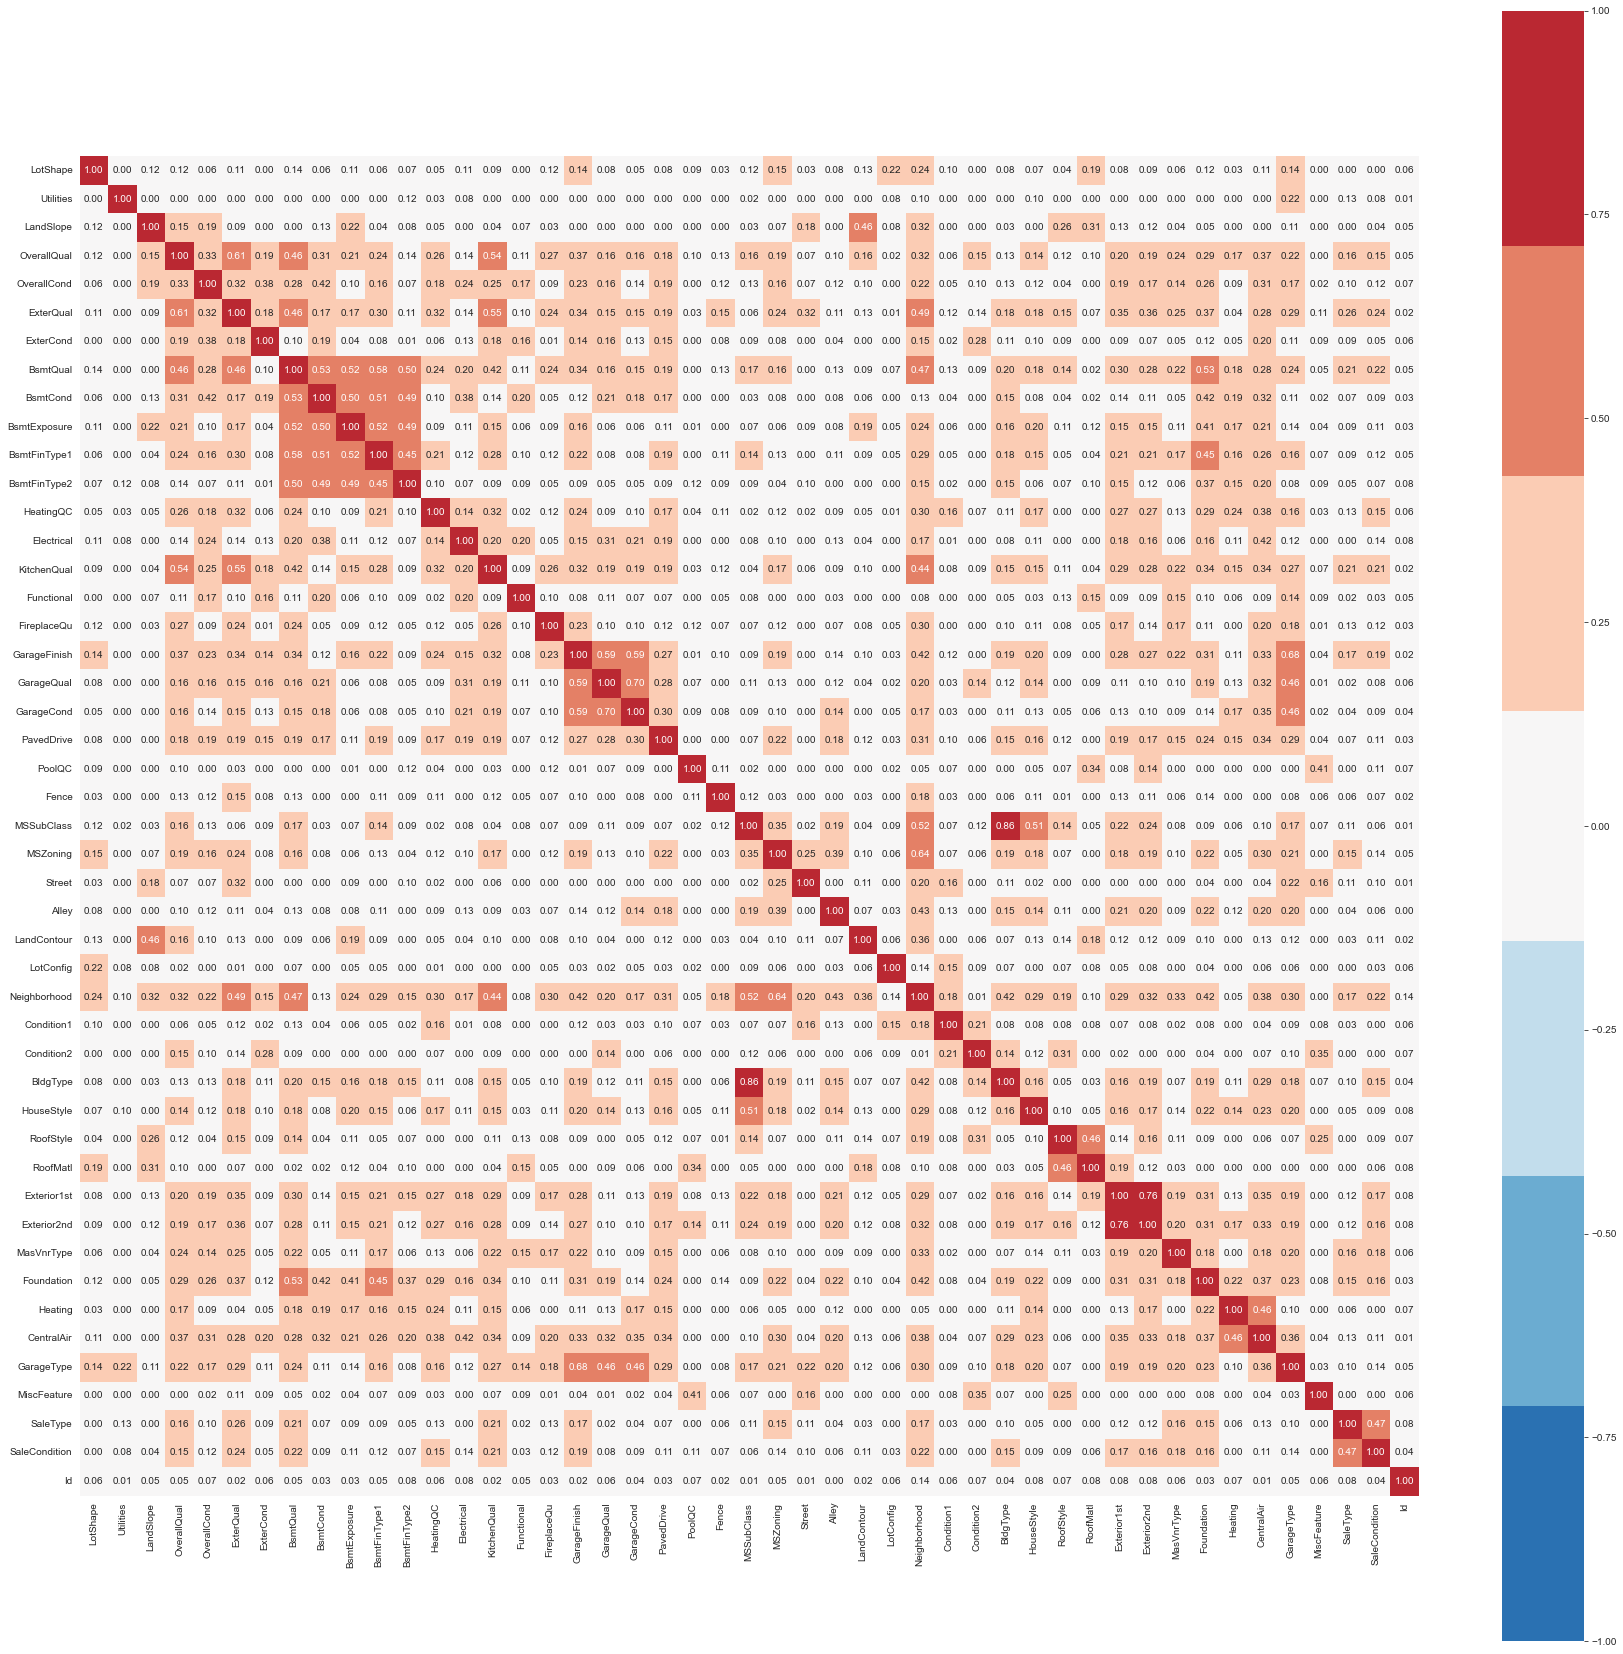

In [23]:
categorical_df = train[categoricals]

categorical_correlation= associations(categorical_df, 
                                      filename= "categorical_correlation.png", 
                                      figsize=(30,30),
                                      cmap=sns.color_palette("RdBu_r", 7))

# Exploratory data analysis final observations 

1. Target (SalePrice) is skewed


2. Numerical features with a correlation > 0.60:
- YearBuilt and GarageYrBlt (YearBuilt has bigger correlation with target than GarageYrBlt)
- YearRemodAdd and GarageYrBlt (GarageYrBlt has bigger correlation with target than YearRemodAdd)
- BsmtFinSF1 and BsmtFullBath (BsmtFinSF1 has bigger correlation with target than BsmtFullBath)
- TotalBsmtSF and 1stFlrSF (TotalBsmtSF has bigger correlation with target than 1stFlrSF)
- 2ndFlrSF and GrLivArea (GrLivArea has bigger correlation with target than 2ndFlrSF)
- 2ndFlrSF and HalfBath (HalfBath has bigger correlation with target than 2ndFlrSF)
- 2ndFlrSF and TotRmsAbvGrd (TotRmsAbvGrd has bigger correlation with target than 2ndFlrSF)
- GrLivArea and FullBath (GrLivArea has more correlation with target than FullBath)
- GrLivArea and TotRmsAbvGrd (GrLivArea has more correlation with target than TotRmsAbvGrd)
- BedroomAbvGr and TotRmsAbvGrd (TotRmsAbvGrd has more correlation with target than BedroomAbvGr)
- GarageCars and GarageArea (GarageCars has more correlation with target than GarageArea)

3. Categorical features with correlation > 0.60:
- MSSubClass and BldgType (both have correlation with feature smaller than 0.60)
- ExterQual and OverallQual (both have correlation with feature bigger than 0.60)
- GarageCond and GarageQual (GarageQual has bigger correlation with target than GarageCond)
- GarageFinish and GarageType (GarageType has bigger correlation with target than GarageFinish)

4. Features to drop because of big amount of null values:
- PoolQC, MiscFeature, Alley, Fence, FireplaceQu

5. Numerical features are skewed, if i use a linear model i need to normalize them


6. Categorical features with imbalaced frequency of categories:

- GarageQual, Street, Utilities, Condition2, RoofMatl, Heating, CentralAir, Electrical, PavedDrive, Fence,
  SaleType, BsmtFinType2, BsmtCond, ExterCond, Alley


7. Numerical features less correlated with target:

- MoSold, LowQualFinSF, 3SsnPorch, MiscVal, PoolArea, BsmtFinSF2, YrSold, BsmtHalfBath	


8. Categorical features less correlated with target:

- Utilities, LandSlope, BsmtFinType1, BsmtFinType2, HeatingQC, Electrical, Functional, GarageCond, PavedDrive,
  PoolQC, Fence, MSSubClass, Alley, LandContour, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl
  Exterior1st, Exterior2nd, MiscFeature, SaleType, Id

# 4. PREPROCESSING

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from mlxtend.feature_selection import ColumnSelector
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD

In [25]:
#Train test split.

X = train.drop("SalePrice",axis=1)
y = train["SalePrice"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)

# Algorithm check

ridge: 0.786578 (0.193232)
lasso: 0.812358 (0.196001)
random forest: 0.846275 (0.040148)
xgboost: 0.855479 (0.028876)


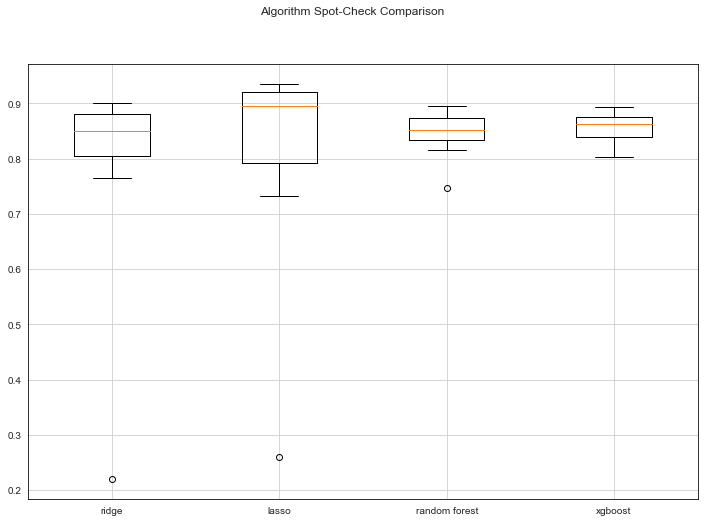

In [26]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import learning_curve, validation_curve
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

#numericals
numericals_features = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF",
                       "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF",
                       "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal","YearBuilt", "YearRemodAdd",
                       "GarageYrBlt", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath","BedroomAbvGr","MoSold", 
                       "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "YrSold"]

#categoricals
categoricals_features = ["LotShape", "Utilities", "LandSlope", "OverallQual", "OverallCond", "ExterQual", "ExterCond",
                         "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", 
                         "Electrical", "KitchenQual", "Functional", "FireplaceQu", "GarageFinish", "GarageQual", 
                         "GarageCond", "PavedDrive","PoolQC", "Fence", "MSSubClass", "MSZoning", "Street", "Alley", 
                         "LandContour", "LotConfig", "Neighborhood", "Condition1","Condition2", "BldgType", 
                         "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Id",
                         "Foundation", "Heating", "CentralAir", "GarageType", "MiscFeature", "SaleType", "SaleCondition"]

#linear preprocessing
numerical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

linear_preprocessing = ColumnTransformer([
    ("categorical", categorical_pipe, categoricals_features),
    ("numerical", numerical_pipe, numericals_features)
])

#tree based preprocessing
numerical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

tree_based_preprocessing = ColumnTransformer([
    ("categorical", categorical_pipe, categoricals_features),
    ("numerical", numerical_pipe, numericals_features)
])

models = []

#ridge
models.append(["ridge", Pipeline([
    ("preprocessing", linear_preprocessing), 
    ("model", Ridge())
])])

#lasso
models.append(["lasso", Pipeline([
    ("preprocessing", linear_preprocessing), 
    ("model", Lasso(max_iter=5000))
])])

#random forest
models.append(["random forest", Pipeline([
    ("preprocessing", tree_based_preprocessing), 
    ("model", RandomForestRegressor())
])])

#xgboost
models.append(["xgboost", Pipeline([
    ("preprocessing", tree_based_preprocessing), 
    ("model", XGBRegressor(use_label_encoder=False))
])])

#evaluating models.
results = []
names = []
scoring = "r2"
for name, model in models:    
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring, n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)   
    
summary = []
summary.append([cv_results.mean(), cv_results.std(), name])
    
# Boxplot algorithm comparison.
fig = plt.figure(figsize=(12,8))
fig.suptitle("Algorithm Spot-Check Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

im going to try xgboost as first option, if it doesnt work i will use Lasso

# Custom transformers

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

overall_mapping = {
    10 : "Very Excellent",
    9 : "Excellent",
    8 : "Very Good",
    7 : "Good",
    6 : "Above Average",
    5 : "Average",
    4 : "Below Average",
    3 : "Fair",
    2 : "Poor",
    1 : "Very Poor",
}

class Cleaning(BaseEstimator,TransformerMixin):
    """
    This function replaces the values of 2 features with their categories
    """
    def __init__(self, overall_mapping):
        self.overall_mapping = overall_mapping
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        X["OverallQual"] = X["OverallQual"].replace(overall_mapping)
        X["OverallCond"] = X["OverallCond"].replace(overall_mapping)
        return X

class OutlierRemover(BaseEstimator,TransformerMixin):
    """
    This functions removes outliers using q1 and q3
    """
    def __init__(self,factor=1.5):
        self.factor = factor
        
    def outlier_detector(self,X,y=None):
        X = pd.Series(X).copy()
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        self.lower_bound.append(q1 - (self.factor * iqr))
        self.upper_bound.append(q3 + (self.factor * iqr))

    def fit(self,X,y=None):
        self.lower_bound = []
        self.upper_bound = []
        X.apply(self.outlier_detector)
        return self
    
    def transform(self,X,y=None):
        X = pd.DataFrame(X).copy()
        for i in range(X.shape[1]):
            x = X.iloc[:, i].copy()
            x[(x < self.lower_bound[i]) | (x > self.upper_bound[i])] = np.nan
            X.iloc[:, i] = x
        return X

# Pipeline

In [28]:
#numerical features
numerical = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", 
             "LowQualFinSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
             "ScreenPorch", "PoolArea", "MiscVal", "BsmtHalfBath", "HalfBath","KitchenAbvGr", "Fireplaces", 
             "YrSold", "MoSold", "YearBuilt", "MSSubClass"]

#ordinal features
ordinal = ["LotShape", "Utilities", "LandSlope", "OverallQual", "OverallCond", "ExterCond","BsmtQual", 
           "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "Electrical","KitchenQual", 
           "Functional", "GarageQual", "PavedDrive"]

#nominal features
nominal = ["MSZoning", "Street", "LandContour", "LotConfig", "Neighborhood", "Condition1", "Condition2", "BldgType", 
           "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating", 
           "CentralAir", "GarageType", "SaleType", "SaleCondition"]

#categories for ordinal features
LotShape_categories = ["IR3","IR2","IR1","Reg"]
Utilities_categories = ["ELO","NoSeWa","NoSewr","AllPub"]
LandSlope_categories = ["Sev","Mod","Gtl"]
OverallQual_categories = ["Very Poor","Poor","Fair","Below Average","Average","Above Average","Good","Very Good","Excellent","Very Excellent"]
OverallCond_categories = ["Very Poor","Poor","Fair","Below Average","Average","Above Average","Good","Very Good","Excellent","Very Excellent"] 
ExterCond_categories = ["Po","Fa","TA","Gd","Ex"]
BsmtQual_categories = ["Po","Fa","TA","Gd","Ex"]
BsmtCond_categories = ["Po","Fa","TA","Gd","Ex"] 
BsmtExposure_categories = ["NA","No","Mn","Av","Gd"]
BsmtFinType1_categories = ["NA","Unf","LwQ","Rec","BLQ","ALQ","GLQ"] 
BsmtFinType2_categories =["NA","Unf","LwQ","Rec","BLQ","ALQ","GLQ"] 
HeatingQC_categories = ["Po","Fa","TA","Gd","Ex"] 
Electrical_categories = ["Mix","FuseP","FuseF","FuseA","SBrkr"]  
KitchenQual_categories = ["Po","Fa","TA","Gd","Ex"] 
Functional_categories = ["Sal","Sev","Maj2","Maj1","Mod","Min2","Min1","Typ"] 
GarageQual_categories = ["Po","Fa","TA","Gd","Ex"]  
PavedDrive_categories = ["N","P","Y"] 

#pipeline for preprocessing numerical features
numerical_pipe = Pipeline([
    ("drop outliers", OutlierRemover()),
    ("imputer", SimpleImputer(strategy="median"))
])

#pipeline for preprocessing nominal features
nominal_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse=False, handle_unknown="ignore"))
])

#pipeline for preprocessing ordinal features
ordinal_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(
                categories=[
                    LotShape_categories,
                    Utilities_categories,
                    LandSlope_categories, 
                    OverallQual_categories, 
                    OverallCond_categories, 
                    ExterCond_categories, 
                    BsmtQual_categories, 
                    BsmtCond_categories, 
                    BsmtExposure_categories, 
                    BsmtFinType1_categories, 
                    BsmtFinType2_categories,
                    HeatingQC_categories, 
                    Electrical_categories, 
                    KitchenQual_categories,
                    Functional_categories, 
                    GarageQual_categories,
                    PavedDrive_categories]))
])

#join the last pipelines in paralell
compose = ColumnTransformer([
    ("nominal", nominal_pipe, nominal),
    ("ordinal", ordinal_pipe, ordinal),
    ("continuous", numerical_pipe, numerical)
])


#pipeline for the model, it has all the transformers and at the end the estimator (XGBRegressor)
model = Pipeline([
    ("first_preprocess", Cleaning(overall_mapping)),
    ("second_preprocess", compose),
    ("estimator", XGBRegressor())
])

# 5. HYPERPARAMETER TUNING AND MODEL EVALUATION

In [30]:
import optuna

def objective(trial):
    params = {
        "estimator__subsample": trial.suggest_float("estimator__subsample", 0.01, 1.0),
        "estimator__colsample_bytree": trial.suggest_float("estimator__colsample_bytree", 0.01, 1.0),
        "estimator__reg_alpha": trial.suggest_float("estimator__reg_alpha", 0.01, 1.0),
        "estimator__reg_lambda": trial.suggest_float("estimator__reg_lambda", 0.01, 1.0),
        "estimator__max_depth": trial.suggest_int("estimator__max_depth", 1, 10),
        "estimator__learning_rate": trial.suggest_float("estimator__learning_rate", 0.005, 0.005),
        "estimator__n_estimators": trial.suggest_int("estimator__n_estimators", 50, 2000),
        "estimator__min_child_weight": trial.suggest_int("estimator__min_child_weight", 1, 10),
        "estimator__gamma": trial.suggest_float("estimator__gamma", 0.01, 1.0)
    }
    model.set_params(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return metrics.r2_score(y_valid, preds)

study = optuna.create_study(direction="maximize", study_name="regression")
study.optimize(objective, n_trials=200)

In [32]:
model = model.set_params(**study.best_params)
model.fit(X_train, y_train)
preds = model.predict(X_valid)

print("R2:", metrics.r2_score(y_valid, preds))
print("MSE:", metrics.mean_squared_error(y_valid, preds))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_valid, preds)))

R2: 0.9015436946190098
MSE: 608422060.1126046
RMSE: 24666.2129260372


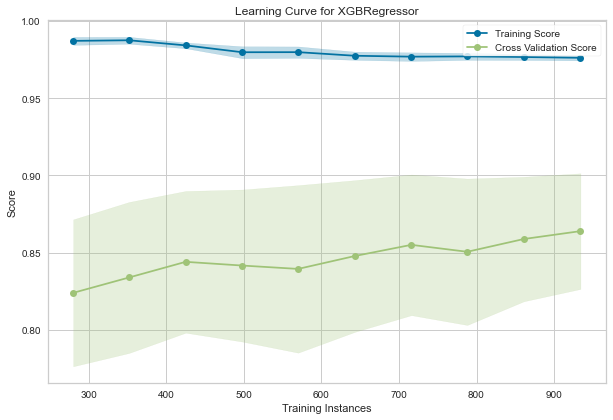

In [33]:
#learning curve to understand if the model is overfitting, underfitting or just fine
#i use yellowbrick library
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5)
sizes = np.linspace(0.3, 1.0, 10)

visualizer = LearningCurve(model, cv=cv, scoring="r2", train_sizes=sizes, n_jobs=4, size=(720,480))

visualizer.fit(X_train, y_train)        
visualizer.show();

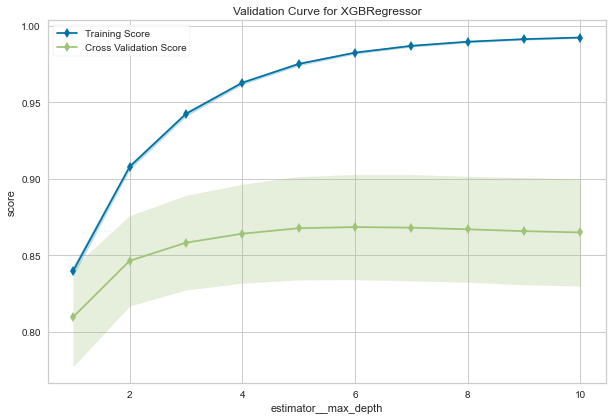

In [34]:
#looking into how the model reacts to different values of C
from yellowbrick.model_selection import ValidationCurve

visualizer = ValidationCurve(model, 
                             param_name="estimator__max_depth", n_jobs=-1,
                             param_range=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                             cv=10, scoring="r2", size=(720,480))

visualizer.fit(X_train, y_train)
visualizer.show();

best max_depth: 6

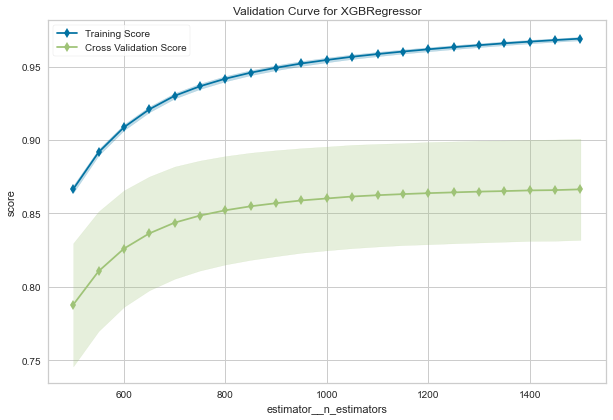

In [35]:
visualizer = ValidationCurve(model, 
                             param_name="estimator__n_estimators", n_jobs=-1,
                             param_range=[500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000,
                                          1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500], 
                             cv=10, scoring="r2", size=(720,480))

visualizer.fit(X_train, y_train)
visualizer.show();

In [36]:
params = {'estimator__subsample': 0.7402644651423106,
          'estimator__colsample_bytree': 0.3353422890650869,
          'estimator__reg_alpha': 0.6666034355591595,
          'estimator__reg_lambda': 0.9622547808902495,
          'estimator__max_depth': 6,
          'estimator__learning_rate': 0.005,
          'estimator__n_estimators': 1200,
          'estimator__min_child_weight': 1,
          'estimator__gamma': 0.14186113765810093}

#model.set_params(**params)

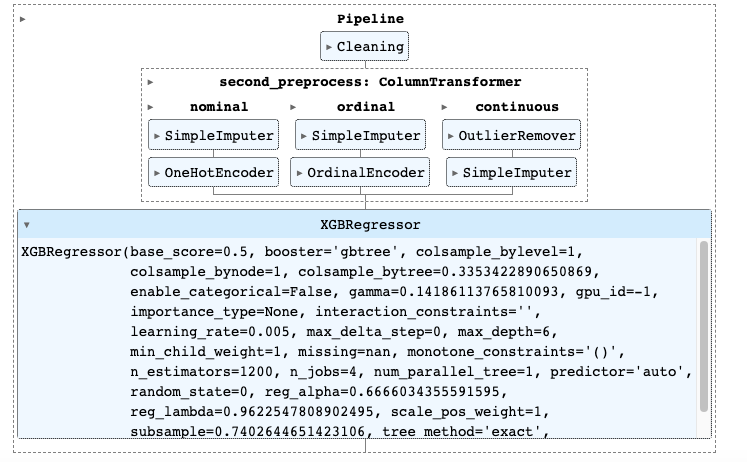

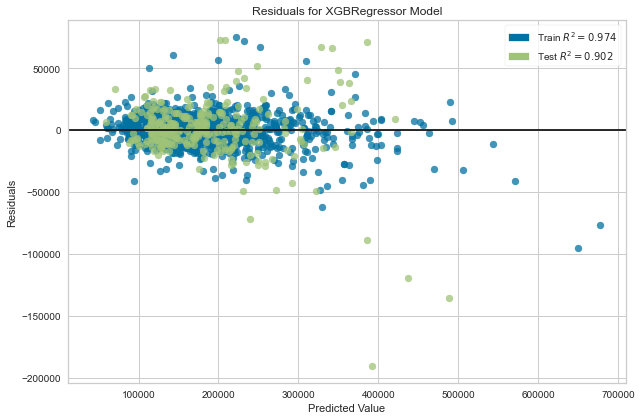

In [38]:
#residual plot
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model, size=(720,480), hist=False)
visualizer.fit(X_train, y_train)  
visualizer.score(X_valid, y_valid)  
visualizer.show();  

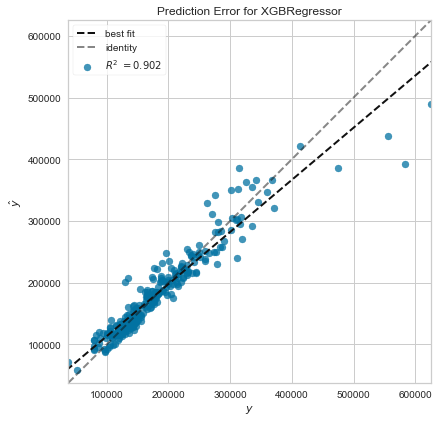

In [39]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model, size=(720,480))
visualizer.fit(X_train, y_train) 
visualizer.score(X_valid, y_valid) 
visualizer.show();